In [93]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
x_org, y_org = iris.data, iris.target

'''
#選擇萼片長度和花瓣長度
x_select = x_org[:,[0,2]]
print('原始數據', x_select.shape, y_org.shape)

#加入虛擬變數
x_all = np.insert(x_select, 0, 1.0, axis=1)
'''

#加入虛擬變數
x_all = np.insert(x_org, 0, 1.0, axis=1)

In [94]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, categories='auto')
y_work = np.c_[y_org]
y_all_one = ohe.fit_transform(y_work)
print('原始資料shape', y_org.shape)
print('二維化', y_work.shape)
print('One Hot Vector化', y_all_one.shape)

原始資料shape (150,)
二維化 (150, 1)
One Hot Vector化 (150, 3)


In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, y_train_one, y_test_one = train_test_split(
    x_all, y_org, y_all_one, train_size=75, test_size=75, random_state=123)
print(f"""
    shape:\n
    x_train: {x_train.shape}\n
    x_test: {x_test.shape}\n
    y_train: {y_train.shape}\n
    y_test: {y_test.shape}\n
    y_train_one: {y_train_one.shape}\n
    y_test_one: {y_test_one.shape}\n
    """)


    shape:

    x_train: (75, 5)

    x_test: (75, 5)

    y_train: (75,)

    y_test: (75,)

    y_train_one: (75, 3)

    y_test_one: (75, 3)

    


In [96]:
print('輸入資料 (x)')
print(x_train[:5])
print('實際值(y)')
print(y_train[:5])
print('實際值 (One Hot編碼後)')
print(y_train_one[:5,:])

輸入資料 (x)
[[1.  6.3 3.3 4.7 1.6]
 [1.  7.  3.2 4.7 1.4]
 [1.  5.  3.  1.6 0.2]
 [1.  6.4 2.8 5.6 2.1]
 [1.  6.3 2.5 5.  1.9]]
實際值(y)
[1 1 0 2 2]
實際值 (One Hot編碼後)
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [97]:
#訓練變量設定
x, yt  = x_train, y_train_one

In [98]:
# softmax function
def softmax(x):
    x = x.T
    x_max = x.max(axis=0);
    #分量減去最大值避免exp(x)溢位
    x = x - x_max;
    w = np.exp(x)
    return (w / w.sum(axis=0)).T

#計算預測值
def pred(x, W):
    return softmax(x@W)

In [99]:
#初始化

# M=>樣本數  D=>輸入維度(含虛擬變數)
M, D = x.shape

#分類的類別數
N = yt.shape[1]

#迭代運算次數
iters = 10000

#學習率
alpha = 0.01

#權重陣列
W = np.ones((D, N))

#紀錄評估結果
history = np.zeros((0, 3))

In [100]:
# cross entropy
def cross_entropy(yt, yp):
    return -np.mean(np.sum(yt * np.log(yp), axis=1))

#評估模型之函數
from sklearn.metrics import accuracy_score
def evaluate(x_test, y_test, y_test_one, W):
    
    #計算預測值(機率)
    yp_test_one = pred(x_test, W)
    
    #由機率值導出預測的類別是(0, 1, 2)
    yp_test = np.argmax(yp_test_one, axis=1)
    
    #計算損失函數值
    loss = cross_entropy(y_test_one, yp_test_one)
    
    #計算準確率
    score = accuracy_score(y_test, yp_test)
    
    return loss, score

In [101]:
#主程式

for k in range(iters):
    #計算預測值
    yp = pred(x, W)
    
    #計算誤差
    yd = yp - yt
    
    #權重更新
    W = W - alpha * (x.T @ yd) / M
    
    #紀錄
    if (k%10 == 0):
        loss, score = evaluate(x_test, y_test, y_test_one, W)
        history = np.vstack((history, np.array([k, loss, score])))
        print(f"epoch={k}, loss={loss} score={score}")
        

epoch=0, loss=1.0915826495010217 score=0.26666666666666666
epoch=10, loss=1.0417114977132405 score=0.26666666666666666
epoch=20, loss=0.9885006459606033 score=0.26666666666666666
epoch=30, loss=0.9399618226490143 score=0.5733333333333334
epoch=40, loss=0.8970374911120211 score=0.6266666666666667
epoch=50, loss=0.8591772561551813 score=0.6266666666666667
epoch=60, loss=0.8257236564206245 score=0.6266666666666667
epoch=70, loss=0.7960701461707701 score=0.6266666666666667
epoch=80, loss=0.7696833212075309 score=0.6533333333333333
epoch=90, loss=0.7461030114103767 score=0.6533333333333333
epoch=100, loss=0.7249363506836641 score=0.6933333333333334
epoch=110, loss=0.7058498968870139 score=0.7466666666666667
epoch=120, loss=0.6885614560754341 score=0.76
epoch=130, loss=0.672832391481168 score=0.76
epoch=140, loss=0.6584607567409743 score=0.7866666666666666
epoch=150, loss=0.6452753531501841 score=0.7866666666666666
epoch=160, loss=0.6331306854224082 score=0.7866666666666666
epoch=170, loss=0

epoch=1720, loss=0.2908464055013422 score=0.96
epoch=1730, loss=0.29013101440745753 score=0.96
epoch=1740, loss=0.28942054847303617 score=0.96
epoch=1750, loss=0.28871495567027705 score=0.96
epoch=1760, loss=0.2880141847637757 score=0.96
epoch=1770, loss=0.2873181852932861 score=0.96
epoch=1780, loss=0.2866269075569952 score=0.96
epoch=1790, loss=0.28594030259529346 score=0.96
epoch=1800, loss=0.2852583221750242 score=0.96
epoch=1810, loss=0.28458091877419306 score=0.96
epoch=1820, loss=0.28390804556711635 score=0.96
epoch=1830, loss=0.2832396564099993 score=0.96
epoch=1840, loss=0.282575705826923 score=0.96
epoch=1850, loss=0.28191614899622724 score=0.96
epoch=1860, loss=0.2812609417372747 score=0.96
epoch=1870, loss=0.28061004049758326 score=0.96
epoch=1880, loss=0.2799634023403098 score=0.96
epoch=1890, loss=0.2793209849320812 score=0.96
epoch=1900, loss=0.27868274653115094 score=0.96
epoch=1910, loss=0.2780486459758751 score=0.96
epoch=1920, loss=0.2774186426734979 score=0.96
epoch

epoch=4440, loss=0.19021468818819454 score=0.96
epoch=4450, loss=0.19002466542210553 score=0.96
epoch=4460, loss=0.18983532042867157 score=0.96
epoch=4470, loss=0.18964664959588332 score=0.96
epoch=4480, loss=0.18945864933724088 score=0.96
epoch=4490, loss=0.18927131609153253 score=0.96
epoch=4500, loss=0.18908464632261135 score=0.96
epoch=4510, loss=0.18889863651917752 score=0.96
epoch=4520, loss=0.1887132831945622 score=0.96
epoch=4530, loss=0.18852858288651259 score=0.96
epoch=4540, loss=0.18834453215698022 score=0.96
epoch=4550, loss=0.1881611275919106 score=0.96
epoch=4560, loss=0.18797836580103672 score=0.96
epoch=4570, loss=0.18779624341767234 score=0.96
epoch=4580, loss=0.18761475709850906 score=0.96
epoch=4590, loss=0.18743390352341513 score=0.96
epoch=4600, loss=0.18725367939523554 score=0.96
epoch=4610, loss=0.18707408143959567 score=0.96
epoch=4620, loss=0.18689510640470586 score=0.96
epoch=4630, loss=0.18671675106116797 score=0.96
epoch=4640, loss=0.18653901220178337 score

epoch=6970, loss=0.15706904090459806 score=0.96
epoch=6980, loss=0.15697899991486297 score=0.96
epoch=6990, loss=0.1568891804382551 score=0.96
epoch=7000, loss=0.1567995816594063 score=0.96
epoch=7010, loss=0.15671020276695313 score=0.96
epoch=7020, loss=0.15662104295350973 score=0.96
epoch=7030, loss=0.15653210141564558 score=0.96
epoch=7040, loss=0.15644337735386052 score=0.96
epoch=7050, loss=0.15635486997255957 score=0.96
epoch=7060, loss=0.15626657848003125 score=0.96
epoch=7070, loss=0.15617850208842265 score=0.96
epoch=7080, loss=0.15609064001371623 score=0.96
epoch=7090, loss=0.15600299147570668 score=0.96
epoch=7100, loss=0.1559155556979772 score=0.96
epoch=7110, loss=0.1558283319078781 score=0.96
epoch=7120, loss=0.15574131933650204 score=0.96
epoch=7130, loss=0.15565451721866272 score=0.96
epoch=7140, loss=0.15556792479287246 score=0.96
epoch=7150, loss=0.15548154130131833 score=0.96
epoch=7160, loss=0.15539536598984174 score=0.96
epoch=7170, loss=0.15530939810791666 score=0

epoch=9800, loss=0.13815926724237748 score=0.96
epoch=9810, loss=0.13810980281599058 score=0.96
epoch=9820, loss=0.13806042891321166 score=0.96
epoch=9830, loss=0.13801114528741815 score=0.96
epoch=9840, loss=0.13796195169288464 score=0.96
epoch=9850, loss=0.13791284788477953 score=0.96
epoch=9860, loss=0.13786383361916157 score=0.96
epoch=9870, loss=0.13781490865297533 score=0.96
epoch=9880, loss=0.13776607274404748 score=0.96
epoch=9890, loss=0.13771732565108144 score=0.96
epoch=9900, loss=0.13766866713365578 score=0.96
epoch=9910, loss=0.13762009695221789 score=0.96
epoch=9920, loss=0.13757161486808203 score=0.96
epoch=9930, loss=0.1375232206434242 score=0.96
epoch=9940, loss=0.13747491404127749 score=0.96
epoch=9950, loss=0.1374266948255305 score=0.96
epoch=9960, loss=0.13737856276092233 score=0.96
epoch=9970, loss=0.13733051761303772 score=0.96
epoch=9980, loss=0.13728255914830462 score=0.96
epoch=9990, loss=0.13723468713399006 score=0.96


In [102]:
#損失函數與準確率初始/最終確認
print(f"""
    [初始狀態]\n\n
    損失函數: {history[0, 1]}\n
    準確率: {history[0, 2]}\n\n
    [最終狀態]\n\n
    損失函數: {history[-1, 1]}\n
    準確率: {history[-1, 2]}
    """)


    [初始狀態]


    損失函數: 1.0915826495010217

    準確率: 0.26666666666666666


    [最終狀態]


    損失函數: 0.13723468713399006

    準確率: 0.96
    


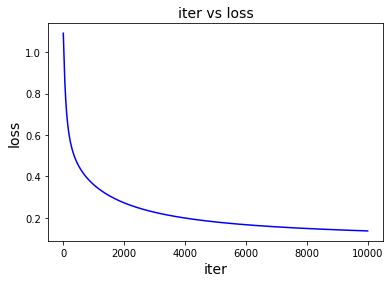

In [103]:
#繪製學習曲線(損失函數)
plt.figure(figsize=(6, 4))
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.title('iter vs loss', fontsize=14)
plt.show()

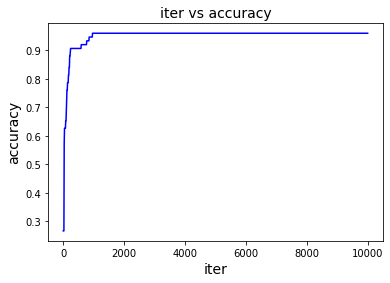

In [104]:
#繪製學習曲線(準確率)
plt.figure(figsize=(6, 4))
plt.plot(history[:,0], history[:,2], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()